In [31]:
import numpy as np
import math

import matplotlib.pyplot as plt
import cartopy.crs as crs
import cartopy.feature as cfeature
import matplotlib.colors as colors
from matplotlib.cm import get_cmap
from matplotlib import ticker
import matplotlib.gridspec as gridspec

from cartopy import config
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from cartopy.util import add_cyclic_point

from IPython.display import Image

from tqdm import tqdm
import os 

In [32]:
N_head = 5 # first 5 lines are head lines, not include data
N_column = 4+2

Nx = 36
Ny = 21
Nz = 5
N_parcel = 3780

if Nx*Ny*Nz!=N_parcel: print('ERROR: parcel number is wrong!')
    
N_inject = 1 # how many injecting times

In [78]:
# 01

file01 = open("Lifetime01.txt", 'r')
Lines = file01.readlines()

# Strips the newline character
data = []
for line in tqdm(Lines):
    a = line.split()
    data.append(float(a[0]))
    
    
i = 0
lifetime_01 = np.zeros((Nz,Ny,Nx, N_inject))
for i_inject in tqdm(range(N_inject)):
    for ix in range(Nx):
        for iy in range(Ny):
            for iz in range(Nz):
                lifetime_01[iz,iy,ix,i_inject] = data[i]
                i = i+1

100%|██████████| 1/1 [00:00<00:00, 291.62it/s]


In [79]:
np.max(lifetime_01)

3536.0

In [80]:
# 04

file04 = open("Lifetime04.txt", 'r')
Lines = file04.readlines()

# Strips the newline character
data = []
for line in tqdm(Lines):
    a = line.split()
    data.append(float(a[0]))
    
    
i = 0
lifetime_04 = np.zeros((Nz,Ny,Nx, N_inject))
for i_inject in tqdm(range(N_inject)):
    for ix in range(Nx):
        for iy in range(Ny):
            for iz in range(Nz):
                lifetime_04[iz,iy,ix,i_inject] = data[i]
                i = i+1

100%|██████████| 1/1 [00:00<00:00, 277.88it/s]


In [81]:
np.max(lifetime_04)

3624.0

In [82]:
# 07

file07 = open("Lifetime07.txt", 'r')
Lines = file07.readlines()

# Strips the newline character
data = []
for line in tqdm(Lines):
    a = line.split()
    data.append(float(a[0]))
    
    
i = 0
lifetime_07 = np.zeros((Nz,Ny,Nx, N_inject))
for i_inject in tqdm(range(N_inject)):
    for ix in range(Nx):
        for iy in range(Ny):
            for iz in range(Nz):
                lifetime_07[iz,iy,ix,i_inject] = data[i]
                i = i+1

100%|██████████| 1/1 [00:00<00:00, 257.46it/s]


In [83]:
np.max(lifetime_07)

3621.0

In [84]:
# 10

file10 = open("Lifetime10.txt", 'r')
Lines = file10.readlines()

# Strips the newline character
data = []
for line in tqdm(Lines):
    a = line.split()
    data.append(float(a[0]))
    
    
i = 0
lifetime_10 = np.zeros((Nz,Ny,Nx, N_inject))
for i_inject in tqdm(range(N_inject)):
    for ix in range(Nx):
        for iy in range(Ny):
            for iz in range(Nz):
                lifetime_10[iz,iy,ix,i_inject] = data[i]
                i = i+1

100%|██████████| 1/1 [00:00<00:00, 500.51it/s]


In [85]:
np.max(lifetime_10)

3538.0

In [86]:
N_mon = 4 # 01, 04, 07, 10
Life = np.zeros((Nz,Ny,Nx,N_inject,N_mon))
Life[:,:,:,:,0] = lifetime_01
Life[:,:,:,:,1] = lifetime_04
Life[:,:,:,:,2] = lifetime_07
Life[:,:,:,:,3] = lifetime_10

Life_mean = np.mean(Life, axis=(1,2,3,4))
Life_std = np.std(Life, axis=(1,2,3,4))

Life_max = np.max(Life, axis=(1,2,3,4))
Life_min = np.min(Life, axis=(1,2,3,4))


Life_Q1 = np.zeros(5)
Life_90th = np.zeros(5)
Life_99th = np.zeros(5)

for i in range(Nz):
    Life_Q1[i] = np.percentile(Life[i,:,:,:,:].flatten(), 25)  # Q1
    Life_90th[i] = np.percentile(Life[i,:,:,:,:].flatten(), 99)  # Q1
    Life_99th[i] = np.percentile(Life[i,:,:,:,:].flatten(), 99.9)  # Q1
    
    

Life01_mean = np.mean(lifetime_01, axis=(1,2,3))
Life04_mean = np.mean(lifetime_04, axis=(1,2,3))
Life07_mean = np.mean(lifetime_07, axis=(1,2,3))
Life10_mean = np.mean(lifetime_10, axis=(1,2,3))

Life01_max = np.max(lifetime_01, axis=(1,2,3))
Life04_max = np.max(lifetime_04, axis=(1,2,3))
Life07_max = np.max(lifetime_07, axis=(1,2,3))
Life10_max = np.max(lifetime_10, axis=(1,2,3))

# Life01_min = np.min(lifetime_01, axis=(1,2,3))
# Life04_min = np.min(lifetime_04, axis=(1,2,3))
# Life07_min = np.min(lifetime_07, axis=(1,2,3))
# Life10_min = np.min(lifetime_10, axis=(1,2,3))

In [87]:
Life_max

array([1965., 3624., 3621., 3476., 3538.])

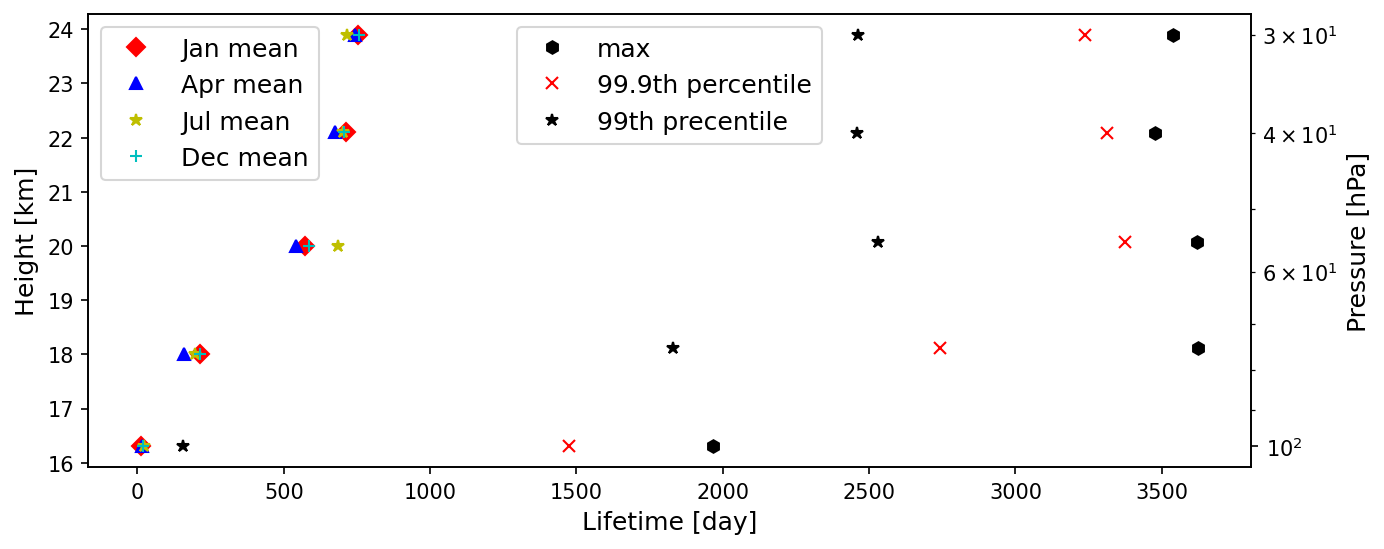

In [88]:
Pressure = [100, 75, 55, 40, 30] # hPa
Height = [16.3, 18, 20, 22.1, 23.9] # km

fig, ax1 = plt.subplots(figsize=(10,4), dpi=150)

ax2 = ax1.twinx()

ax1.plot(Life01_mean, Height, 'rD', label='Jan mean')
ax1.plot(Life04_mean, Height, 'b^', label='Apr mean')
ax1.plot(Life07_mean, Height, 'y*', label='Jul mean')
ax1.plot(Life10_mean, Height, 'c+', label='Dec mean')

# ax1.plot(Life01_max, Height, 'rD', label='Jan')
# ax1.plot(Life04_max, Height, 'b^', label='Apr')
# ax1.plot(Life07_max, Height, 'y*', label='Jul')
# ax1.plot(Life10_max, Height, 'c+', label='Dec')
# ax1.plot(-1, -1, 'ko', label='Total mean')

ax1.set_xlabel('Lifetime [day]', fontsize=12)
ax1.set_ylabel('Height [km]', fontsize=12)


ax2.plot(Life_max, Pressure, 'kh', label='max')
ax2.plot(Life_99th, Pressure, 'rx', label='99.9th percentile')
ax2.plot(Life_90th, Pressure, 'k*', label='99th precentile')
# ax2.plot(Life_min, Pressure, 'ko', label='Total mean')


ax2.set_ylabel('Pressure [hPa]', fontsize=12)
ax2.set_yscale('log')
ax2.invert_yaxis()

ax1.legend(loc='upper left', fontsize=12);
ax2.legend(loc="upper center", fontsize=12);
# plt.legend();

In [66]:
# Pressure = [100, 70, 50, 40, 25] # hPa

# # for i in range(len(Pressure)):
# #     Xs = [Life_mean[i], Life_mean[i]]
# #     Ys = [Pressure[i], Pressure[i]]
# #     plt.plot(Xs, Ys, 'k')

# plt.figure(figsize=(5,5), dpi=150)    

# plt.plot(Life01_mean, Pressure, 'rD', label='Jan')
# plt.plot(Life04_mean, Pressure, 'b^', label='Apr')
# plt.plot(Life07_mean, Pressure, 'y*', label='Jul')
# plt.plot(Life10_mean, Pressure, 'c+', label='Dec')

# plt.plot(Life_mean, Pressure, 'ko', label='Total mean')

# plt.xlabel('global mean lifetime [day]')
# plt.ylabel('Pressure [hPa]')

# plt.yscale('log')
# plt.gca().invert_yaxis()

# plt.legend();

In [41]:
directory = '/n/home12/hongwei/HONGWEI/lagranto.ecmwf/Simulation/run_10yr_2000'
filename = '/traj.20000101'

In [42]:
# loop for all traj files for month 01

file1 = open(directory+filename, 'r')
Lines = file1.readlines()
Nt = int( (len(Lines)-4)/N_parcel - 1 ) # 2928


# (1) read original data from traj files
data = np.zeros((N_parcel, Nt, N_column))

file1 = open(directory+filename, 'r')
Lines = file1.readlines()

count = 0
# Strips the newline character
for line in Lines:
    count += 1
    
    if count>=5:
        i = count-5
        i_parcel = math.floor( i / (Nt+1) ) # Nt time lines plue 1 empty line
        i_t = i%(Nt+1)
        
        if i_t!=0:
            a = line.split()

            if i_t==1:
                if float(a[0])!=0.0: print('ERROR: first time is not 0 !!!')
                
            data[i_parcel,i_t-1,1] = float(a[1]) # lon
            data[i_parcel,i_t-1,2] = float(a[2]) # lat
            data[i_parcel,i_t-1,3] = float(a[3]) # lev
                
                
# (2) re-shape data(N_parcel, Nt, N_column) to data2(Nz,Ny,Nx,Nt,N_column)
data2 = np.zeros((Nz,Ny,Nx,Nt,N_column))

for iy in range(Ny):
    for iz in range(Nz):
        for ix in range(Nx):
            i_parcel = iy*(Nz*Nx) + iz*Nx + ix
            data2[iz,iy,ix,:,:] = data[i_parcel,:,:]
                
                
# (3) calculate injected tracer lifetime in the stratosphere
P_cont = 200 # [hPa]
lifetime = np.zeros((Nz,Ny,Nx))

for iy in range(Ny):
    for iz in range(Nz):
        for ix in range(Nx):
            Num = 0
            for i in data2[iz,iy,ix,:,3]:
                Num = Num+1
                if i>=P_cont: 
                    lifetime[iz,iy,ix] = Num*3/24 # hour to day
                    break
                
                
# (4) create 2-D LAT and LON
LON = np.zeros((Ny,Nx))
LAT = np.zeros((Ny,Nx))

for iy in range(Ny):
    for ix in range(Nx):
        LON[iy,ix] = data2[0,iy,ix,0,1]
        LAT[iy,ix] = data2[0,iy,ix,0,2]
        
        
# (5) Sort lat dimension from min to max [-20:20]
index = np.argsort(LAT[:,0])

LAT[:,:] = LAT[index,:]
LON[:,:] = LON[index,:]

In [43]:
Life_xy = np.mean(Life, axis=(3,4))

Life01_xy = np.mean(lifetime_01, axis=(3))
Life04_xy = np.mean(lifetime_04, axis=(3))
Life07_xy = np.mean(lifetime_07, axis=(3))
Life10_xy = np.mean(lifetime_10, axis=(3))

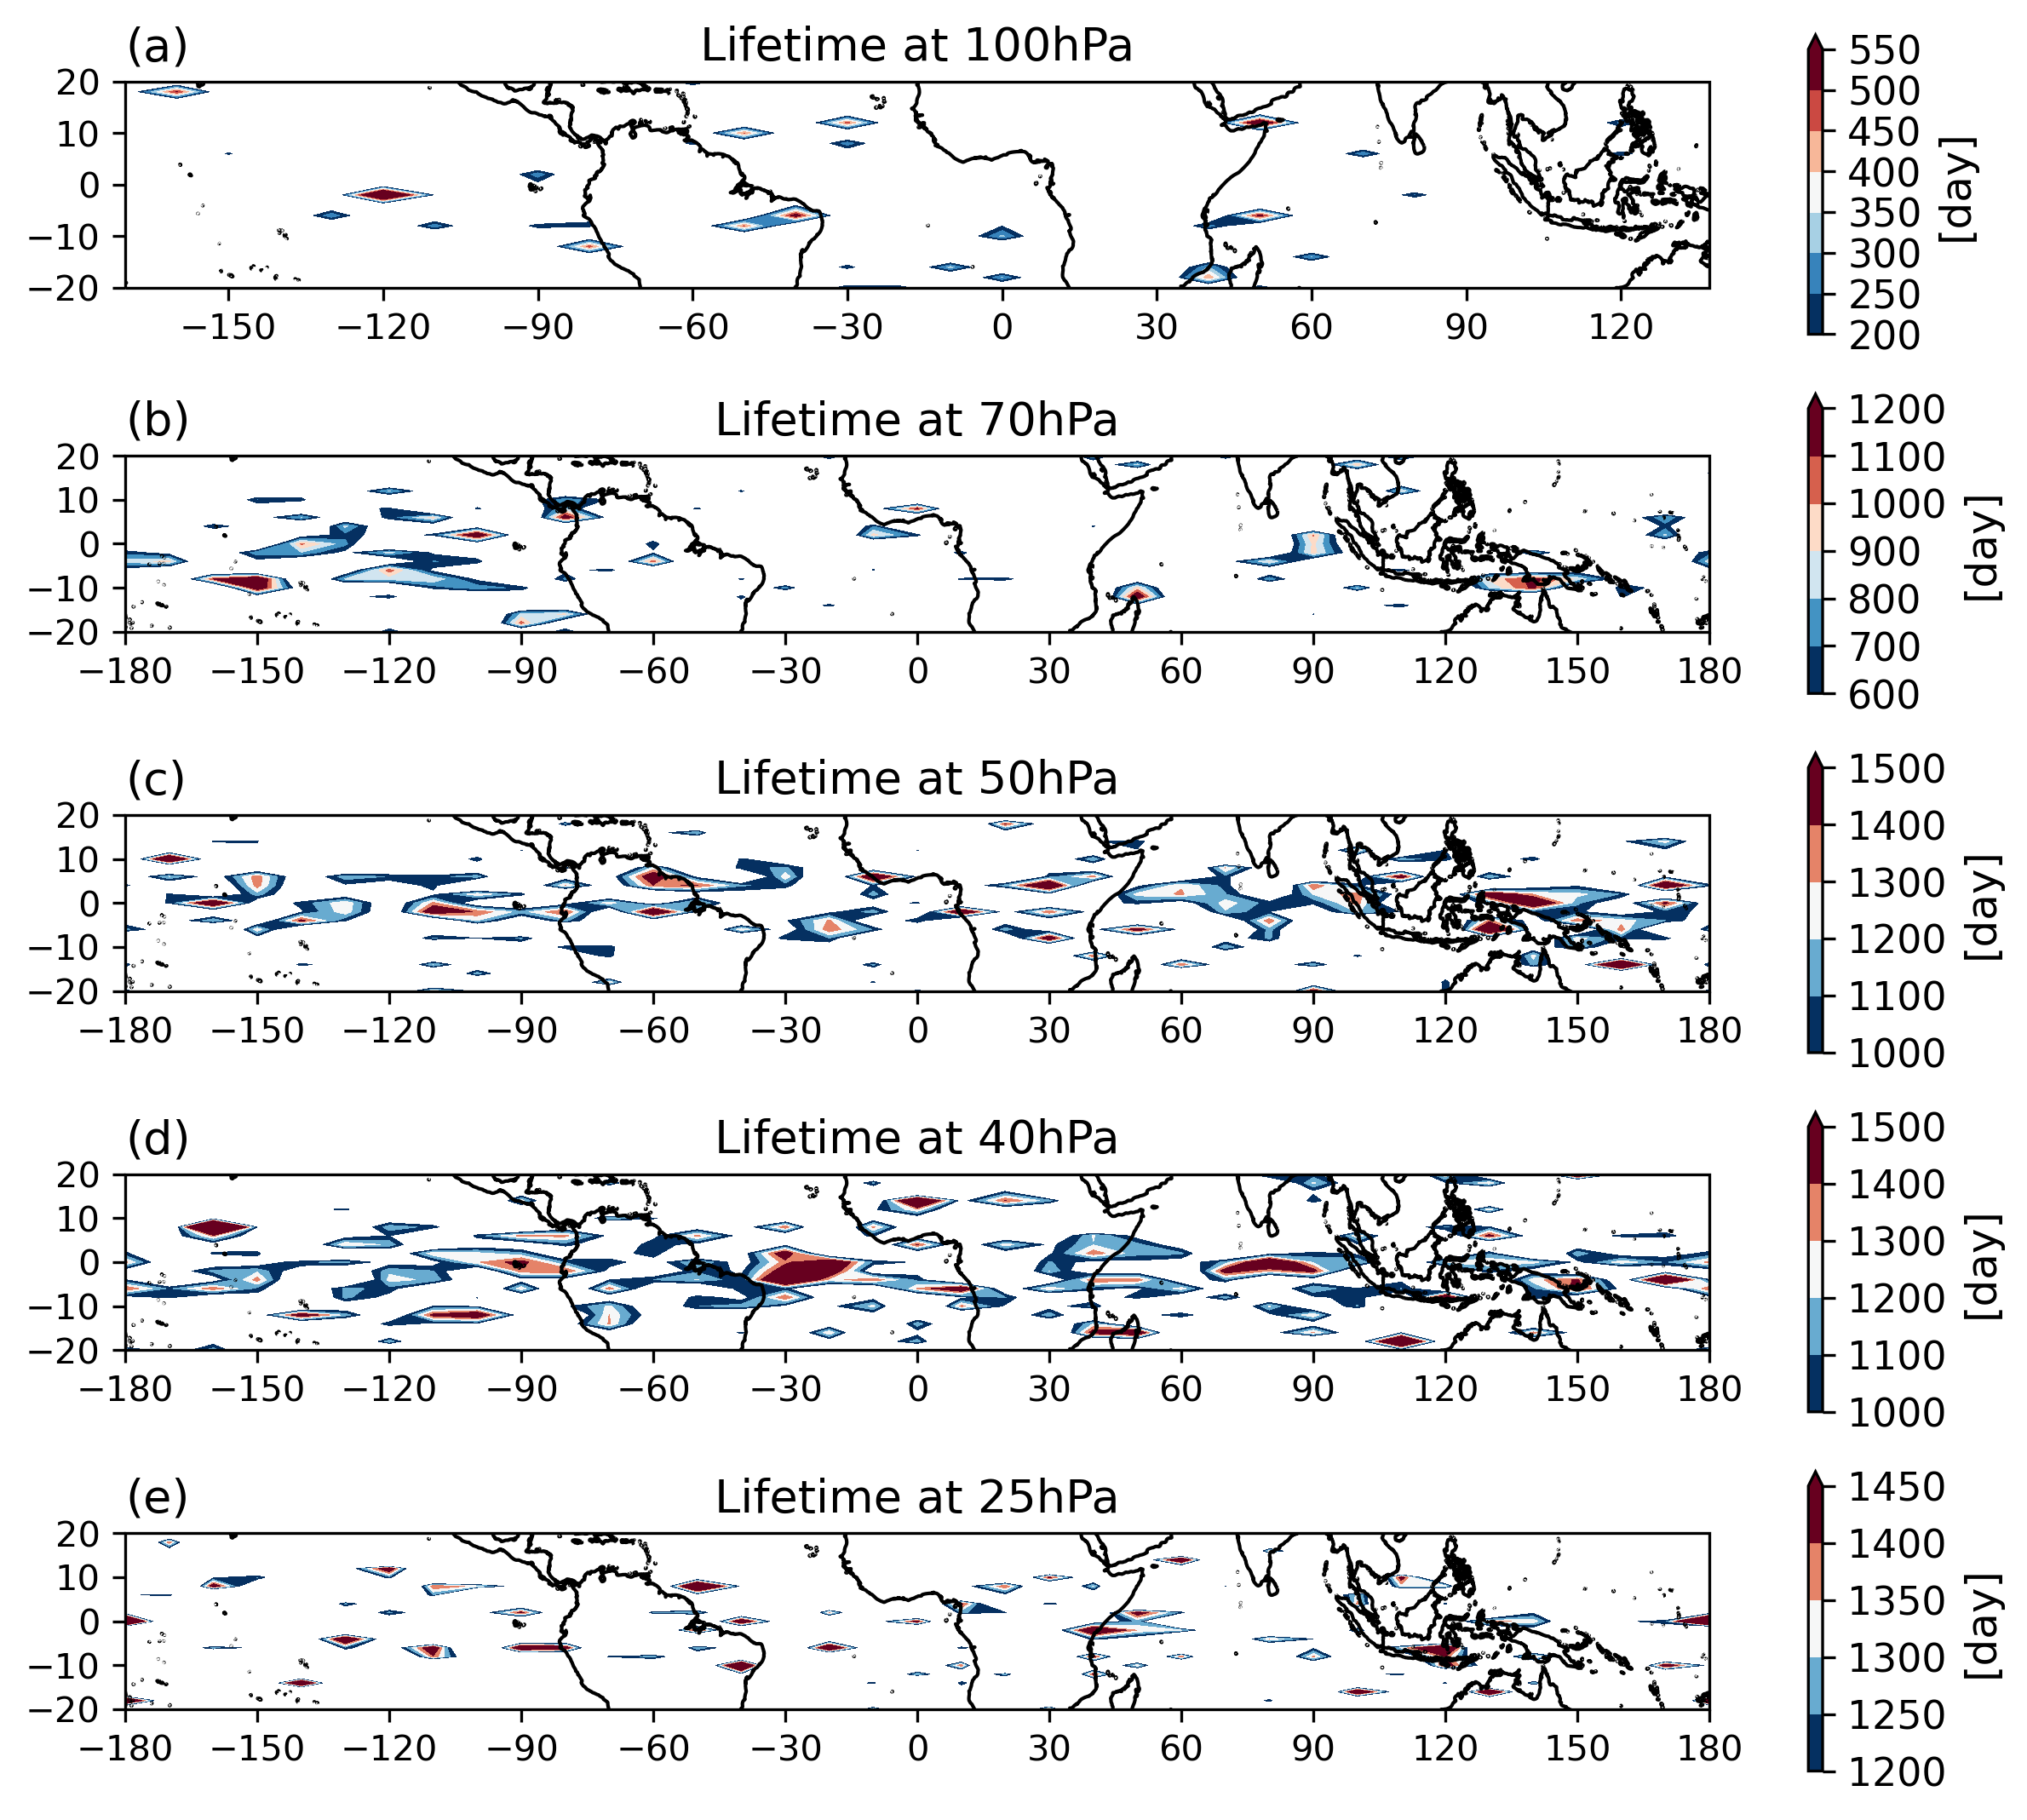

In [44]:
fig = plt.figure(figsize=(10,9), dpi=300);
# gs = gridspec.GridSpec(1, 10, figure=fig)
# plt.suptitle('Day: '+str(i+1), fontsize=16);

# ax1

# ax1 = plt.subplot(3,1,1)
projection=ccrs.PlateCarree()
# ax1 = fig.add_subplot(projection=ccrs.PlateCarree())
ax1 = plt.subplot(5, 1, 1, projection=ccrs.PlateCarree());
# ax1.set_global()
    
# ax1.gridlines(x_inline=True)    
ax1.set_xticks(np.linspace(-180, 180, 13), crs=projection)
ax1.set_yticks(np.linspace(-20, 20, 5), crs=projection)
# lon_formatter = LongitudeFormatter(zero_direction_label=True)
# lat_formatter = LatitudeFormatter()
# ax1.xaxis.set_major_formatter(lon_formatter)
# ax1.yaxis.set_major_formatter(lat_formatter)
#     z = ma.masked_where(LA_Zsum[i,:,:] <= 1e-10, LA_Zsum[i,:,:])

levels =  np.arange(200,600,50)
norm = colors.BoundaryNorm(boundaries=levels, ncolors=256)

lat0 = LAT[:,0]
lon0 = LON[0,:]
datas = Life_xy[0,:,:]
cyclic_datas = add_cyclic_point(datas)
datas, lon0_cyclic = add_cyclic_point(datas, coord=lon0)
    
ax1_contours = ax1.contourf(lon0_cyclic, lat0, datas, levels=levels, norm=norm,\
                                transform=ccrs.PlateCarree(), cmap=get_cmap("RdBu_r"), extend="max");
    
# cb1 = plt.colorbar(ax1_contours, ax=ax1, orientation="horizontal")
cb1 = plt.colorbar(ax1_contours, ax=ax1)
cb1.ax.tick_params(labelsize=11)
cb1.set_label('[day]', fontsize=12)
    
ax1.coastlines();
ax1.set_title('Lifetime at 100hPa', fontsize=13);
ax1.set_title('(a)', fontsize=13, loc='left');

# ax2

ax2 = plt.subplot(5, 1, 2, projection=ccrs.PlateCarree());
    
ax2.set_xticks(np.linspace(-180, 180, 13), crs=projection)
ax2.set_yticks(np.linspace(-20, 20, 5), crs=projection)

levels =  np.arange(600,1300,100)
norm = colors.BoundaryNorm(boundaries=levels, ncolors=256)

lat0 = LAT[:,0]
lon0 = LON[0,:]
datas = Life_xy[1,:,:]
cyclic_datas = add_cyclic_point(datas)
datas, lon0_cyclic = add_cyclic_point(datas, coord=lon0)
    
ax2_contours = ax2.contourf(lon0_cyclic, lat0, datas, levels=levels, norm=norm,\
                                transform=ccrs.PlateCarree(), cmap=get_cmap("RdBu_r"), extend="max");
    
cb2 = plt.colorbar(ax2_contours, ax=ax2)
cb2.ax.tick_params(labelsize=11)
cb2.set_label('[day]', fontsize=12)
    
ax2.coastlines();
ax2.set_title('Lifetime at 70hPa', fontsize=13);
ax2.set_title('(b)', fontsize=13, loc='left');

# ax=3

ax3 = plt.subplot(5, 1, 3, projection=ccrs.PlateCarree());
    
ax3.set_xticks(np.linspace(-180, 180, 13), crs=projection)
ax3.set_yticks(np.linspace(-20, 20, 5), crs=projection)

levels =  np.arange(1000,1600,100)
norm = colors.BoundaryNorm(boundaries=levels, ncolors=256)

lat0 = LAT[:,0]
lon0 = LON[0,:]
datas = Life_xy[2,:,:]
cyclic_datas = add_cyclic_point(datas)
datas, lon0_cyclic = add_cyclic_point(datas, coord=lon0)
    
ax3_contours = ax3.contourf(lon0_cyclic, lat0, datas, levels=levels, norm=norm,\
                                transform=ccrs.PlateCarree(), cmap=get_cmap("RdBu_r"), extend="max");
    
cb3 = plt.colorbar(ax3_contours, ax=ax3)
cb3.ax.tick_params(labelsize=11)
cb3.set_label('[day]', fontsize=12)
    
ax3.coastlines();
ax3.set_title('Lifetime at 50hPa', fontsize=13);
ax3.set_title('(c)', fontsize=13, loc='left');

# ax=4

ax4 = plt.subplot(5, 1, 4, projection=ccrs.PlateCarree());
    
ax4.set_xticks(np.linspace(-180, 180, 13), crs=projection)
ax4.set_yticks(np.linspace(-20, 20, 5), crs=projection)

levels =  np.arange(1000,1600,100)
norm = colors.BoundaryNorm(boundaries=levels, ncolors=256)

lat0 = LAT[:,0]
lon0 = LON[0,:]
datas = Life_xy[3,:,:]
cyclic_datas = add_cyclic_point(datas)
datas, lon0_cyclic = add_cyclic_point(datas, coord=lon0)
    
ax4_contours = ax4.contourf(lon0_cyclic, lat0, datas, levels=levels, norm=norm,\
                                transform=ccrs.PlateCarree(), cmap=get_cmap("RdBu_r"), extend="max");
    
cb4 = plt.colorbar(ax4_contours, ax=ax4)
cb4.ax.tick_params(labelsize=11)
cb4.set_label('[day]', fontsize=12)
    
ax4.coastlines();
ax4.set_title('Lifetime at 40hPa', fontsize=13);
ax4.set_title('(d)', fontsize=13, loc='left');


# ax=5

ax5 = plt.subplot(5, 1, 5, projection=ccrs.PlateCarree());
    
ax5.set_xticks(np.linspace(-180, 180, 13), crs=projection)
ax5.set_yticks(np.linspace(-20, 20, 5), crs=projection)

levels =  np.arange(1200,1500,50)
norm = colors.BoundaryNorm(boundaries=levels, ncolors=256)

lat0 = LAT[:,0]
lon0 = LON[0,:]
datas = Life_xy[4,:,:]
cyclic_datas = add_cyclic_point(datas)
datas, lon0_cyclic = add_cyclic_point(datas, coord=lon0)
    
ax5_contours = ax5.contourf(lon0_cyclic, lat0, datas, levels=levels, norm=norm,\
                                transform=ccrs.PlateCarree(), cmap=get_cmap("RdBu_r"), extend="max");
    
cb5 = plt.colorbar(ax5_contours, ax=ax5)
cb5.ax.tick_params(labelsize=11)
cb5.set_label('[day]', fontsize=12)
    
ax5.coastlines();
ax5.set_title('Lifetime at 25hPa', fontsize=13);
ax5.set_title('(e)', fontsize=13, loc='left');

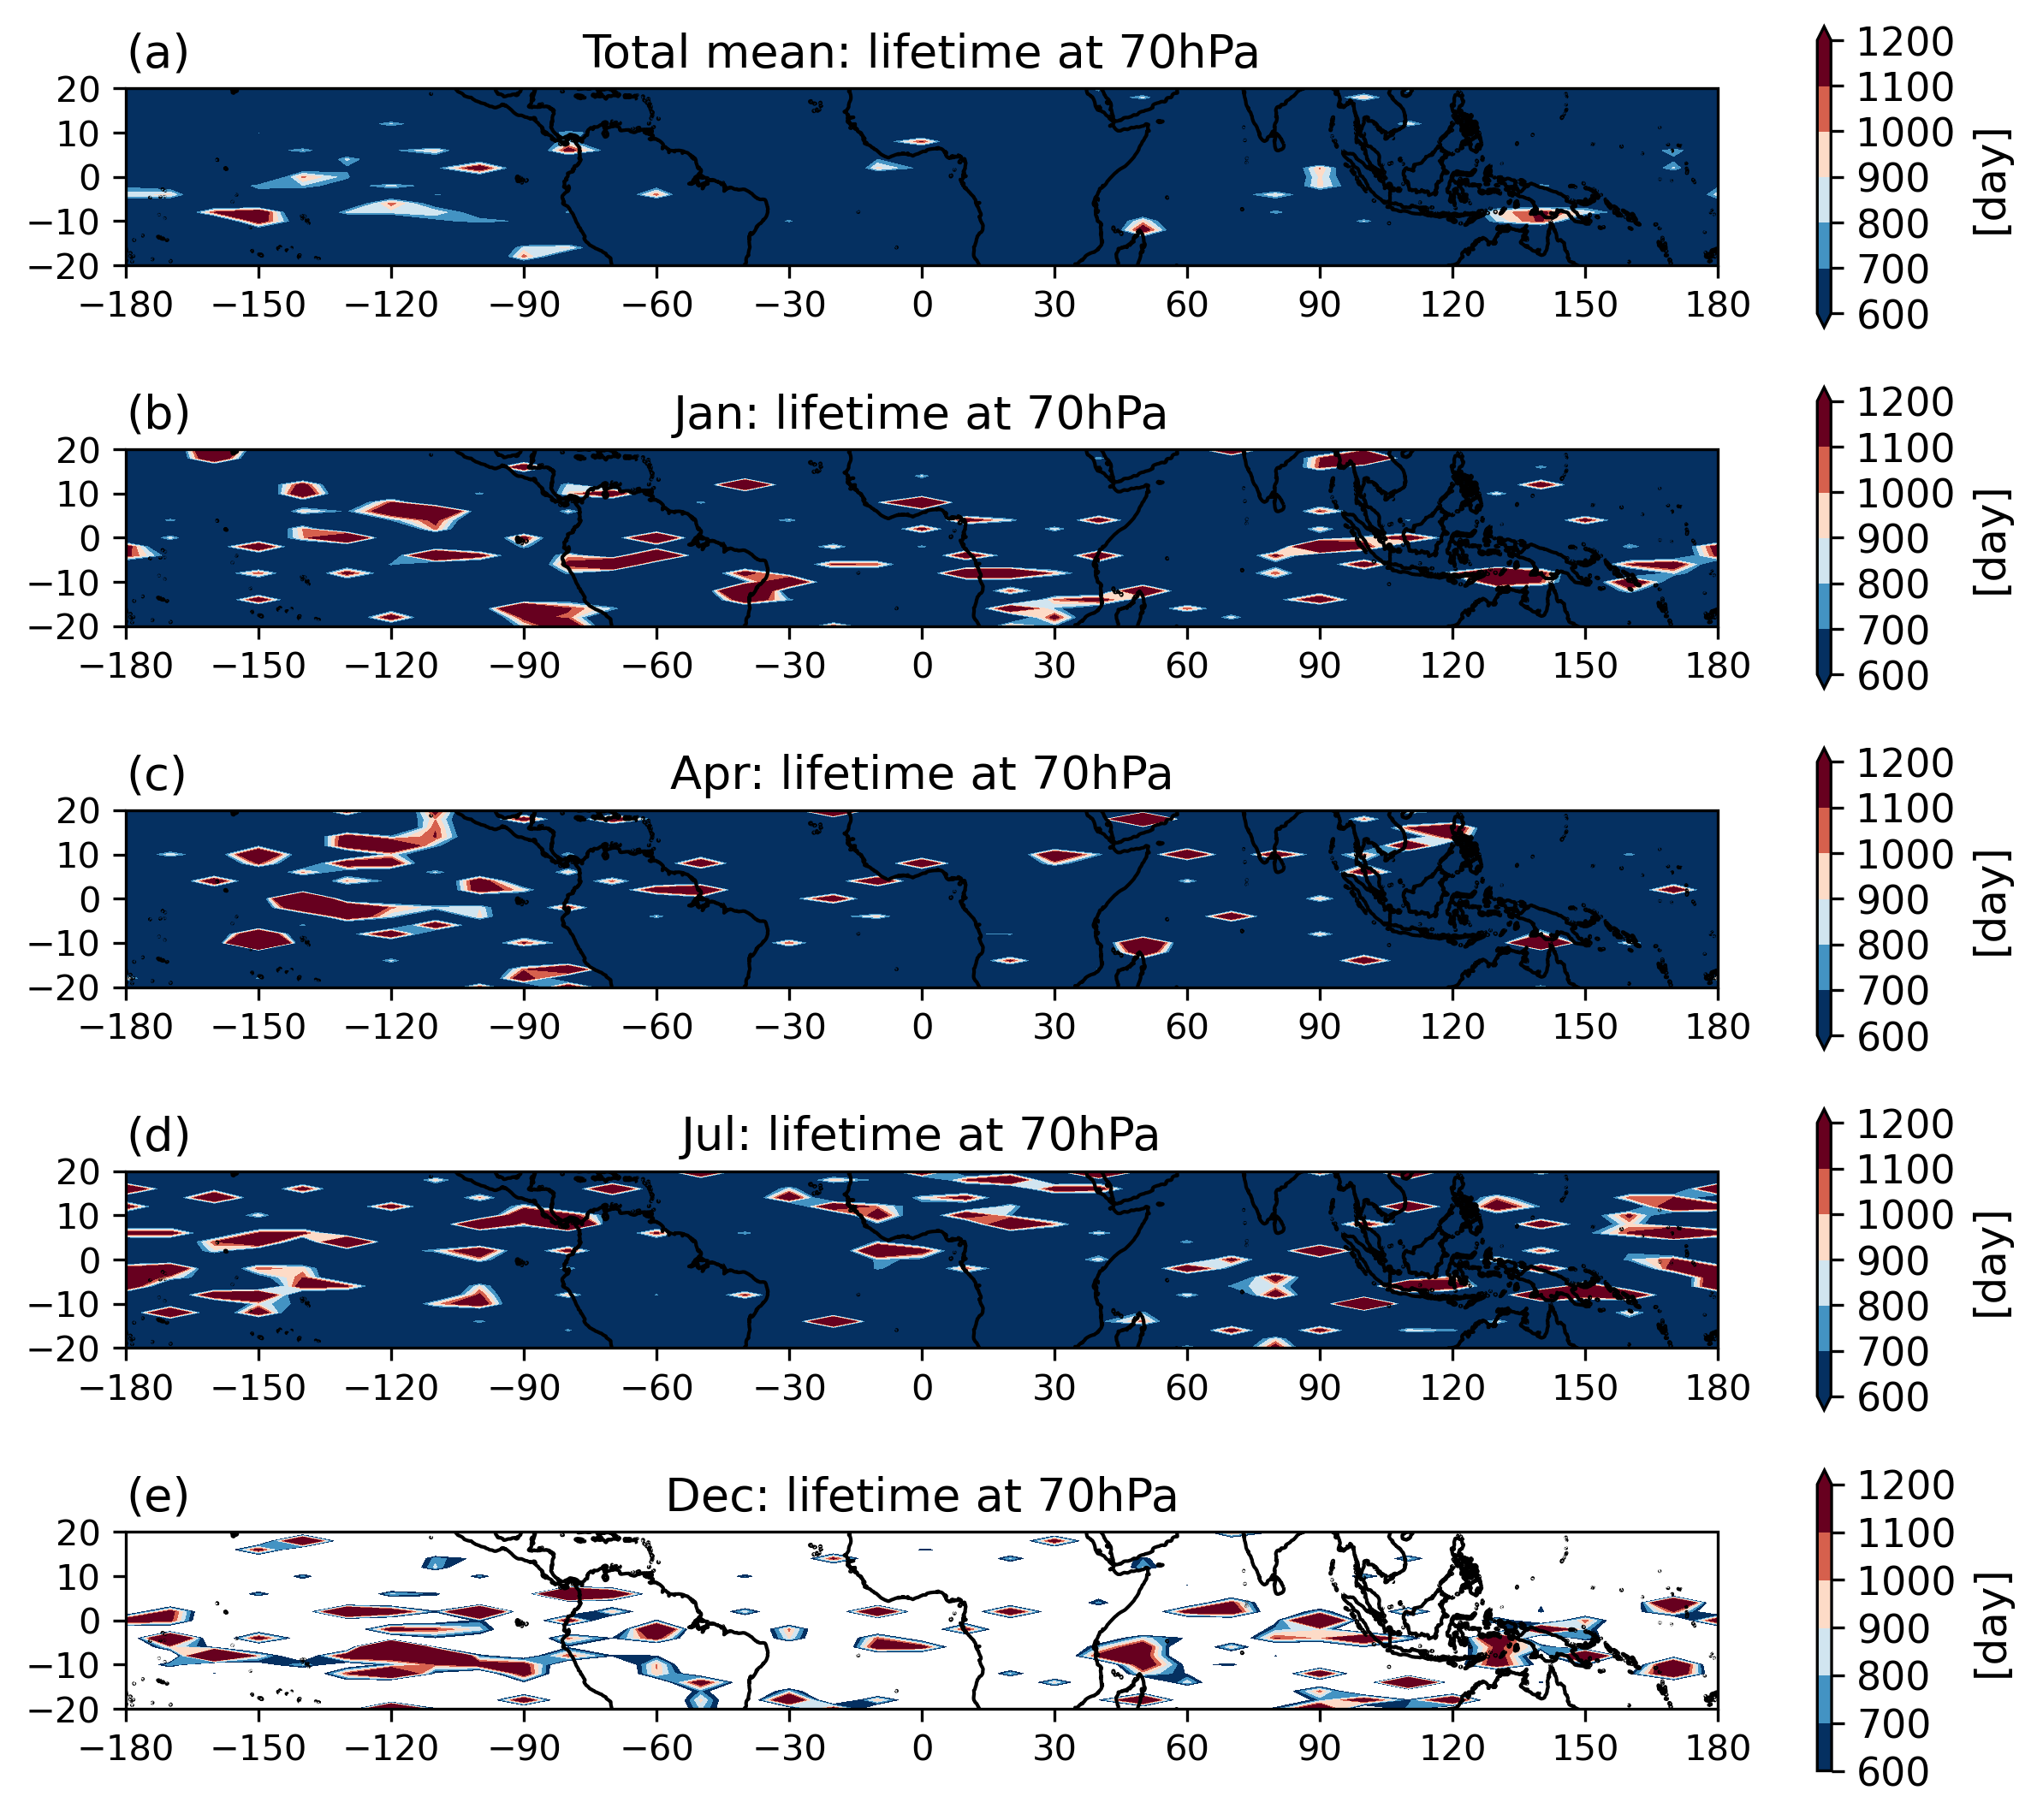

In [45]:
fig = plt.figure(figsize=(10,9), dpi=300);
# gs = gridspec.GridSpec(1, 11, figure=fig)
# plt.suptitle('Day: '+str(i+1), fontsize=16);

# ax1: total mean
projection=ccrs.PlateCarree()
ax1 = plt.subplot(5, 1, 1, projection=ccrs.PlateCarree());

ax1.set_xticks(np.linspace(-180, 180, 13), crs=projection)
ax1.set_yticks(np.linspace(-20, 20, 5), crs=projection)

levels =  np.arange(600,1300,100)
norm = colors.BoundaryNorm(boundaries=levels, ncolors=256)

lat0 = LAT[:,0]
lon0 = LON[0,:]
datas = Life_xy[1,:,:]
cyclic_datas = add_cyclic_point(datas)
datas, lon0_cyclic = add_cyclic_point(datas, coord=lon0)
    
ax1_contours = ax1.contourf(lon0_cyclic, lat0, datas, levels=levels, norm=norm,\
                                transform=ccrs.PlateCarree(), cmap=get_cmap("RdBu_r"), extend="both");
    
cb1 = plt.colorbar(ax1_contours, ax=ax1)
cb1.ax.tick_params(labelsize=11)
cb1.set_label('[day]', fontsize=12)
    
ax1.coastlines();
ax1.set_title('Total mean: lifetime at 70hPa', fontsize=13);
ax1.set_title('(a)', fontsize=13, loc='left');

# ax2

ax2 = plt.subplot(5, 1, 2, projection=ccrs.PlateCarree());
    
ax2.set_xticks(np.linspace(-180, 180, 13), crs=projection)
ax2.set_yticks(np.linspace(-20, 20, 5), crs=projection)

lat0 = LAT[:,0]
lon0 = LON[0,:]
datas = Life01_xy[1,:,:]
cyclic_datas = add_cyclic_point(datas)
datas, lon0_cyclic = add_cyclic_point(datas, coord=lon0)
    
ax2_contours = ax2.contourf(lon0_cyclic, lat0, datas, levels=levels, norm=norm,\
                                transform=ccrs.PlateCarree(), cmap=get_cmap("RdBu_r"), extend="both");
    
cb2 = plt.colorbar(ax2_contours, ax=ax2)
cb2.ax.tick_params(labelsize=11)
cb2.set_label('[day]', fontsize=12)
    
ax2.coastlines();
ax2.set_title('Jan: lifetime at 70hPa', fontsize=13);
ax2.set_title('(b)', fontsize=13, loc='left');

# ax=3

ax3 = plt.subplot(5, 1, 3, projection=ccrs.PlateCarree());
    
ax3.set_xticks(np.linspace(-180, 180, 13), crs=projection)
ax3.set_yticks(np.linspace(-20, 20, 5), crs=projection)

lat0 = LAT[:,0]
lon0 = LON[0,:]
datas = Life04_xy[1,:,:]
cyclic_datas = add_cyclic_point(datas)
datas, lon0_cyclic = add_cyclic_point(datas, coord=lon0)
    
ax3_contours = ax3.contourf(lon0_cyclic, lat0, datas, levels=levels, norm=norm,\
                                transform=ccrs.PlateCarree(), cmap=get_cmap("RdBu_r"), extend="both");
    
cb3 = plt.colorbar(ax3_contours, ax=ax3)
cb3.ax.tick_params(labelsize=11)
cb3.set_label('[day]', fontsize=12)
    
ax3.coastlines();
ax3.set_title('Apr: lifetime at 70hPa', fontsize=13);
ax3.set_title('(c)', fontsize=13, loc='left');

# ax=4

ax4 = plt.subplot(5, 1, 4, projection=ccrs.PlateCarree());
    
ax4.set_xticks(np.linspace(-180, 180, 13), crs=projection)
ax4.set_yticks(np.linspace(-20, 20, 5), crs=projection)

lat0 = LAT[:,0]
lon0 = LON[0,:]
datas = Life07_xy[1,:,:]
cyclic_datas = add_cyclic_point(datas)
datas, lon0_cyclic = add_cyclic_point(datas, coord=lon0)
    
ax4_contours = ax4.contourf(lon0_cyclic, lat0, datas, levels=levels, norm=norm,\
                                transform=ccrs.PlateCarree(), cmap=get_cmap("RdBu_r"), extend="both");
    
cb4 = plt.colorbar(ax4_contours, ax=ax4)
cb4.ax.tick_params(labelsize=11)
cb4.set_label('[day]', fontsize=12)
    
ax4.coastlines();
ax4.set_title('Jul: lifetime at 70hPa', fontsize=13);
ax4.set_title('(d)', fontsize=13, loc='left');


# ax=5

ax5 = plt.subplot(5, 1, 5, projection=ccrs.PlateCarree());
    
ax5.set_xticks(np.linspace(-180, 180, 13), crs=projection)
ax5.set_yticks(np.linspace(-20, 20, 5), crs=projection)

lat0 = LAT[:,0]
lon0 = LON[0,:]
datas = Life10_xy[1,:,:]
cyclic_datas = add_cyclic_point(datas)
datas, lon0_cyclic = add_cyclic_point(datas, coord=lon0)
    
ax5_contours = ax5.contourf(lon0_cyclic, lat0, datas, levels=levels, norm=norm,\
                                transform=ccrs.PlateCarree(), cmap=get_cmap("RdBu_r"), extend="max");
    
cb5 = plt.colorbar(ax5_contours, ax=ax5)
cb5.ax.tick_params(labelsize=11)
cb5.set_label('[day]', fontsize=12)
    
ax5.coastlines();
ax5.set_title('Dec: lifetime at 70hPa', fontsize=13);
ax5.set_title('(e)', fontsize=13, loc='left');